In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Schéma explicite

$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}+\frac{u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right)}{2 \Delta x}-\frac{\nu\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)}{\Delta x^{2}}=0
$$

On réécrit 
$$
u_{j}^{n+1} = u_{j}^{n} - \frac{\Delta t}{2 \Delta x}u_{j}^{n}\left(u_{j+1}^{n}-u_{j-1}^{n}\right) + \frac{\nu \Delta t}{\Delta x^{2}}\left(u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}\right)
$$

$$AU =u_{j-1}^{n}-2 u_{j}^{n}+u_{j+1}^{n}$$

$$BU = u_{j+1}^{n}-u_{j-1}^{n}$$

In [2]:
f = lambda x : (x**2)/2

def explicite(N,dT,tend,nu):
    h = 1/(N+1)
    K=int(tend/dT)
    
    A = np.diag(-2*np.ones(N))+np.diag(1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    B = np.diag(-1*np.ones(N-1),-1)+np.diag(1*np.ones(N-1),1)
    #I = np.ones((N,N))
    
    x=np.linspace(h,1-h,N)
    u=np.sin(2*np.pi*x) #initialisation
    #u_0 = lambda y : 3*(y==0)
    #u = u_0(x)

    for i in range(K):
        F = np.dot(B,f(u))
        #u = u - dT/(2*h) * np.dot(u,np.dot(B,u)) + nu*dT/(h**2) * np.dot(A,u)
        u = u - dT/(2*h) * F + nu*dT/(h**2) * np.dot(A,u)
        #if i<=2 :
            #plt.plot(x,u,'r')
        
    return u

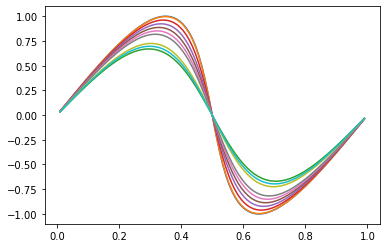

In [8]:
N = 100
tend = 0.1
dT = 10**-4
nu = [0.0001,0.001,0.1,0.01,0.02,0.03,0.04,0.05,0.08,0.09] #1/2 point particulier = explosion : instable

U=[]
for i in range(len(nu)) :
    U.append(explicite(N,dT,tend,nu[i]))

h=1/(N+1)
x=np.linspace(h,1-h,N)

for i in U :
    plt.plot(x,i)
#U

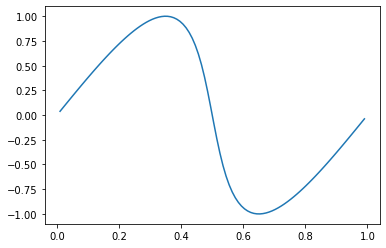

In [6]:
N = 100
tend = 0.1
dT = 10**-4
nu = 0.00000000000000001

U = explicite(N,dT,tend,nu)

h=1/(N+1)
x=np.linspace(h,1-h,N)

plt.plot(x,U);
#U

## Schéma implicite

$$
\frac{\Delta u_{j}^{n+1}}{\Delta t}=-\frac{L_{x}\left(F_{j}^{n}+F_{j}^{n+1}\right)}{2}+v \frac{L_{x x}\left(u_{j}^{n}+u_{j}^{n+1}\right)}{2}
$$

$$
\text { où } \Delta u_{j}^{n+1}=u_{j}^{n+1}-u_{j}^{n} \quad L_{x}=\frac{(-1,0,1)}{2 \Delta x} \quad \text { et } \quad L_{x x}=\frac{(1,-2,1)}{\Delta x^{2}}
$$

In [39]:
def implicite(n,dt,tf,nu):
    
    dx = 1/n
    r = nu*dt/(dx*dx)
    
    X = np.zeros(n+1)
    U1 = np.zeros(n+1)
    a = np.zeros(n+1)
    b = np.zeros(n+1)
    c = np.zeros(n+1)
    d = np.zeros(n+1)
    c2 = np.zeros(n+1)
    d2 = np.zeros(n+1)
    
    for i in range(n+1):
        X[i]=(i-1)*dx
    
    for i in range(n+1):
        U1[i]=np.sin(2*np.pi*(i-1)/n)
    t=0
    while t < tf :
        t=t+dt
    
        for j in range(1,n+1):
            a[j] = -0.25*dt*U1[j-1]/dx - 0.5*r
        for j in range(n+1):
            b[j] = 1+r
        for j in range(n):
            c[j] = 0.25*dt*U1[j+1]/dx - 0.5*r

        d[0]=(1-r)*U1[0] + 0.5*r*U1[1]
        d[n]=0.5*r*U1[n-1] + (1-r)*U1[n]
        for j in range(1,n):
            d[j] = 0.5*r*U1[j-1] + (1-r)*U1[j] + 0.5*r*U1[j+1]

        c2[0] = c[0]/b[0]
        d2[0] = d[0]/b[0]
        for i in range(1,n+1):
            c2[i] = c[i] / (b[i]-a[i]*c2[i-1])
            d2[i] = (d[i]-a[i]*d2[i-1]) / (b[i]-a[i]*c2[i-1])

        U1[n] = d2[n]
        for i in range(n):
            U1[n-1-i] = d2[n-1-i] - U1[n-2-i+2]*c2[n-1-i]
            
    return X,U1

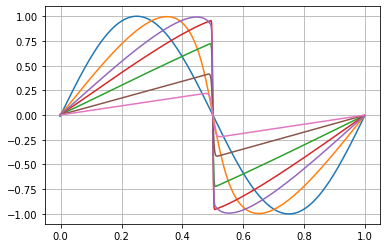

In [40]:
n = 500
dt = 10**-4
tf = [0,0.1,0.5,0.3,0.2,1,2]
nu = 10**-3

U_f=[]
for i in tf :
    X,U = implicite(n,dt,i,nu)
    U_f.append(U)
    
for i in U_f :
    plt.plot(X,i)
    
plt.grid();

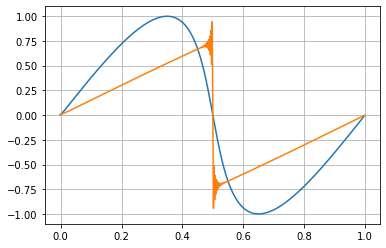

In [37]:
n = 500
dt = 10**-4
tf = [0.1,0.5]
nu = 10**-4

U_f=[]
for i in tf :
    X,U = implicite(n,dt,i,nu)
    U_f.append(U)
    
for i in U_f :
    plt.plot(X,i)
    
plt.grid();

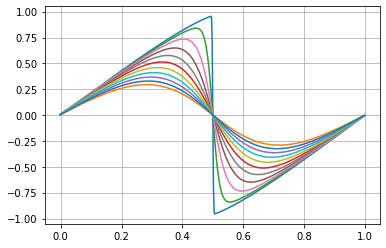

In [38]:
n = 500
dt = 10**-4
tf = 0.3
nu = [0.001,0.1,0.01,0.05,0.08,0.03,0.02,0.04,0.06,0.07,0.09]

U_f=[]
for i in nu :
    X,U = implicite(n,dt,tf,i)
    U_f.append(U)
    
for i in U_f :
    plt.plot(X,i)

plt.grid();